In [1]:
import os

import numpy as np
import pandas as pd
# import tensorflow.keras as keras
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import hyperopt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

DIR_TRAIN = os.getcwd() + "\\data\\train.csv"
DIR_TEST = os.getcwd() + "\\data\\test.csv"

test_names = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train_names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
               'Embarked']

Using TensorFlow backend.


In [2]:
def loadData(is_train, dir):
    if is_train:
        names = train_names
    else:
        names = test_names
    data = pd.read_csv(dir, header=0, names=names)
    return data

In [3]:
def splitData(datas, labels, splite):
    return train_test_split(datas, labels, test_size=splite, random_state=42)

In [4]:
data_train = loadData(is_train=True, dir=DIR_TRAIN)

In [5]:
data_test = loadData(is_train=False,dir=DIR_TEST)

In [6]:
x_train = data_train.drop(['PassengerId','Ticket','Survived','Cabin'],axis = 1)
y_train = data_train['Survived']

In [7]:
print(x_train.head())
print(y_train.head())

   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch     Fare Embarked  
0      1      0   7.2500        S  
1      1      0  71.2833        C  
2      0      0   7.9250        S  
3      1      0  53.1000        S  
4      0      0   8.0500        S  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [8]:
x_val = data_test.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [9]:
print(x_train.shape)
print(x_val.shape)
data = x_train.append(x_val)
print(data.shape)

(891, 8)
(418, 8)
(1309, 8)


In [10]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
data['Title'] = data['Name'].map(lambda x: x.split(', ')[1].split('.')[0])
data.sample(20)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
316,1,"Spencer, Mr. William Augustus",male,57.0,1,0,146.5208,C,Mr
197,3,"Nilsson, Miss. Berta Olivia",female,18.0,0,0,7.7750,S,Miss
99,3,"Nancarrow, Mr. William Henry",male,33.0,0,0,8.0500,S,Mr
643,3,"Foo, Mr. Choong",male,NaN,0,0,56.4958,S,Mr
478,3,"Karlsson, Mr. Nils August",male,22.0,0,0,7.5208,S,Mr
90,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,13.9000,S,Mrs
393,2,"Gilbert, Mr. William",male,47.0,0,0,10.5000,S,Mr
718,3,"McEvoy, Mr. Michael",male,NaN,0,0,15.5000,Q,Mr
251,3,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,7.9250,S,Mr
256,3,"Mahon, Mr. John",male,NaN,0,0,7.7500,Q,Mr


In [12]:
data = data.drop('Name',axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [13]:
data['FamilySize'] = data['SibSp']+data['Parch']+1
data.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
241,2,female,45.0,0,2,30.0000,S,Mrs,3
642,3,female,2.0,3,2,27.9000,S,Miss,6
352,3,male,15.0,1,1,7.2292,C,Mr,3
97,3,male,29.0,0,0,7.9250,S,Mr,1
338,3,male,45.0,0,0,8.0500,S,Mr,1
207,3,male,26.0,0,0,18.7875,C,Mr,1
322,2,female,30.0,0,0,12.3500,Q,Miss,1
378,1,male,55.0,0,0,50.0000,S,Mr,1
349,3,male,42.0,0,0,8.6625,S,Mr,1
172,3,male,23.0,1,0,13.9000,S,Mr,2


In [14]:
data['IsAlone'] = 1
data['IsAlone'].loc[data['FamilySize'] > 1] = 0
data.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
855,3,female,18.0,0,1,9.3500,S,Mrs,2,0
364,1,female,25.0,1,0,55.4417,C,Mrs,2,0
316,2,female,24.0,1,0,26.0000,S,Mrs,2,0
412,1,female,33.0,1,0,90.0000,Q,Miss,2,0
608,2,female,22.0,1,2,41.5792,C,Mrs,4,0
367,3,female,22.0,0,0,39.6875,S,Miss,1,1
752,3,male,33.0,0,0,9.5000,S,Mr,1,1
188,3,male,40.0,1,1,15.5000,Q,Mr,3,0
251,3,female,29.0,1,1,10.4625,S,Mrs,3,0
374,1,female,54.0,1,1,81.8583,S,Mrs,3,0


In [15]:
print('-' *10)
print(x_train.isnull().sum())
print('-' *10)
print(x_val.isnull().sum())

----------
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
----------
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [16]:
print(data['Title'].value_counts())
#将Title小于10的变为Msic

title_names = (data['Title'].value_counts()<10)

data['Title'] = data['Title'].map(lambda x: 'Msic' if title_names.loc[x] == True else x)
data.sample(20)

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Dona              1
Lady              1
Capt              1
Jonkheer          1
the Countess      1
Mme               1
Don               1
Sir               1
Name: Title, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
323,2,female,22.0,1,1,29.0000,S,Mrs,3,0
747,2,female,30.0,0,0,13.0000,S,Miss,1,1
259,2,female,50.0,0,1,26.0000,S,Mrs,2,0
51,2,male,27.0,0,0,15.0333,C,Mr,1,1
300,3,male,32.0,0,0,7.7750,S,Mr,1,1
407,2,male,3.0,1,1,18.7500,S,Master,3,0
84,2,male,NaN,0,0,10.7083,Q,Mr,1,1
320,3,male,26.0,0,0,7.7750,S,Mr,1,1
333,3,female,19.0,1,1,15.7417,C,Mrs,3,0
160,3,male,44.0,0,1,16.1000,S,Mr,2,0


In [17]:
age_mean = data['Age'].mean()
fare_mean = data['Fare'].mean()
print('age mean : {}    fare mean : {}'.format(age_mean,fare_mean))

age mean : 29.881137667304014    fare mean : 33.29547928134557


In [18]:
#mode 泛数
data['Embarked'].mode()

0    S
dtype: object

In [19]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data = data.fillna({'Age':age_mean,'Fare':fare_mean})

In [20]:
print(data.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64


In [21]:
data['Embarked'] = pd.Categorical(data['Embarked'])
data['Embarked'] = data['Embarked'].cat.codes+1

data['Sex'] = pd.Categorical(data['Sex'])
data['Sex'] = data['Sex'].cat.codes+1

data['Title'] = pd.Categorical(data['Title'])
data['Title'] = data['Title'].cat.codes+1

In [22]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,2,22.0,1,0,7.2500,3,3,2,0
1,1,1,38.0,1,0,71.2833,1,4,2,0
2,3,1,26.0,0,0,7.9250,3,2,1,1
3,1,1,35.0,1,0,53.1000,3,4,2,0
4,3,2,35.0,0,0,8.0500,3,3,1,1


In [23]:
age_bin = [-1,0,5,12,18,25,35,60,120]
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
age_cat = pd.cut(data['Age'],bins=age_bin,labels=group_names)
data['Age'] = age_cat.cat.codes

In [24]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,2,4,1,0,7.2500,3,3,2,0
1,1,1,6,1,0,71.2833,1,4,2,0
2,3,1,5,0,0,7.9250,3,2,1,1
3,1,1,5,1,0,53.1000,3,4,2,0
4,3,2,5,0,0,8.0500,3,3,1,1


In [25]:
fare_bin = (-1, 0, 8, 15, 31, 1000)
group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
fare_cat = pd.cut(data['Fare'],bins=fare_bin,labels=group_names)
data['Fare'] = fare_cat.cat.codes
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,2,4,1,0,1,3,3,2,0
1,1,1,6,1,0,4,1,4,2,0
2,3,1,5,0,0,1,3,2,1,1
3,1,1,5,1,0,4,3,4,2,0
4,3,2,5,0,0,2,3,3,1,1


In [26]:
if os.path.exists('./working/train.csv'):
    os.remove('./working/train.csv')
    
save_train = data.iloc[0:891].copy()
save_train['Survived'] = y_train
save_train.to_csv('./working/train.csv',index=False)

if os.path.exists('./working/test.csv'):
    os.remove('./working/test.csv')
    
save_val = data.iloc[891:].copy()
save_val.to_csv('./working/test.csv',index=False)

In [27]:
def generator_data():
    x_train = pd.read_csv('./working/train.csv', header=0,)
    y_train = x_train.pop('Survived') 
    x_train,x_test,y_train,y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=33)
    
    y_train = np.asarray(y_train)
    x_train = np.asarray(x_train)

    y_test = np.asarray(y_test)
    y_train = np.asarray(y_train)
    
    return x_train,y_train,x_test,y_test

In [28]:
x_train_,y_train_,x_test_,y_test_ = generator_data()

In [38]:
from sklearn import svm
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import gaussian_process
from sklearn import discriminant_analysis
import xgboost as xgb  
import lightgbm as lgbm
from sklearn import model_selection

In [39]:
MLA = [
    #支持向量机
    svm.LinearSVC(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    #线性模型
    linear_model.LogisticRegression(),
    linear_model.Perceptron(),
    linear_model.SGDClassifier(),
    linear_model.RidgeClassifier(),
    linear_model.PassiveAggressiveClassifier(),
    
    #贝叶斯
    naive_bayes.GaussianNB(),
    naive_bayes.BernoulliNB(),
    
    #最近邻
    neighbors.KNeighborsClassifier(),
    
    #集成学习
    ensemble.ExtraTreesClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(),
    
    #决策树
    tree.ExtraTreeClassifier(),
    tree.DecisionTreeClassifier(),
    
    #高斯过成
    gaussian_process.GaussianProcessClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    
    xgb.XGBClassifier(),
    
    lgbm.LGBMClassifier(),
    
]

In [40]:
#训练没有参数优化的模型并生成pandas数据
mla_colums = ["MLA Name","MLA params","MLA train acc mean","MLA Test Acc mean","MLA Test ACC 3*STD","MLA Time"]
MLA_compare = pd.DataFrame(columns=mla_colums)
MLA_compare

,MLA Name,MLA params,MLA train acc mean,MLA Test Acc mean,MLA Test ACC 3*STD,MLA Time


In [41]:
cv_split = model_selection.ShuffleSplit(n_splits=10,test_size=0.3,train_size=0.6,random_state=42)

row_index = 0
for alg in MLA:
    colums_index = 0
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,mla_colums[colums_index]] = MLA_name
    colums_index+=1
    MLA_compare.loc[row_index,mla_colums[colums_index]] = str(alg.get_params())
    colums_index+=1
    cv_result = model_selection.cross_validate(alg,x_train_,y_train_,cv = cv_split,return_train_score=True)
#     print(cv_result)
    MLA_compare.loc[row_index,mla_colums[colums_index]] = cv_result['train_score'].mean()
    colums_index+=1
    MLA_compare.loc[row_index,mla_colums[colums_index]] = cv_result['test_score'].mean()
    colums_index+=1
    MLA_compare.loc[row_index,mla_colums[colums_index]] = cv_result['test_score'].std() *3
    colums_index+=1
    MLA_compare.loc[row_index,mla_colums[colums_index]] = cv_result['fit_time'].mean()
    
    
    alg.fit(x_train_,y_train_)
    row_index+=1

In [42]:
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA train acc mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA params,MLA train acc mean,MLA Test Acc mean,MLA Test ACC 3*STD,MLA Time
11,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.905386,0.791589,0.0575279,0.00802155
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.905386,0.779907,0.0745631,0.000601745
16,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.905386,0.78972,0.0923533,0.000401115
15,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.900703,0.797664,0.078817,0.00761685
12,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.899532,0.795327,0.0653939,0.00912468
18,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.88267,0.795327,0.0847638,0.062865
22,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.877986,0.817757,0.0550133,0.0172494
13,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.873302,0.803738,0.0877709,0.0495255
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856909,0.812617,0.0799065,0.0137366
10,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.842857,0.78785,0.0627562,0.000601792


In [43]:
import seaborn as sns

Text(0, 0.5, 'Algorithm')

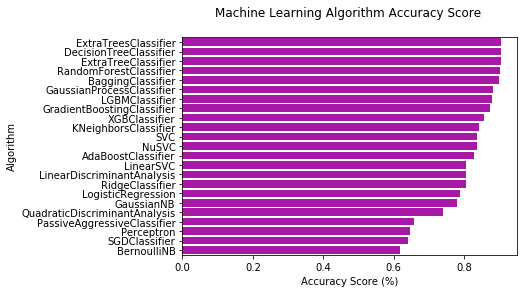

In [44]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA train acc mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [45]:
from hyperopt import Trials, STATUS_OK, tpe,hp
from hyperopt.fmin import fmin
from hyperas import optim
from hyperas.distributions import choice, uniform


def create_model(params,optimizer,loss,metrics):
    '''
    :return: keras model
    '''
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(params['unite1'], activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(keras.layers.Dropout(params['drop1']))
    model.add(keras.layers.Dense(params['unite2'], activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(keras.layers.Dropout(params['drop2']))
    model.add(keras.layers.Dense(params['unite3'], activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(keras.layers.Dropout(params['drop3']))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
#     model.add(keras.layers.Dense(8, activation='relu'))
    model.compile(optimizer,loss,metrics)
    
    return model

In [46]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
import hyperopt.pyll.stochastic
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [47]:
unite1=[8,10,12,14,16,18,20]
drop1=[0.2]
unite2=[8,10,12,14,16,18,20]
drop2=[0.2]
unite3=[8,10,12,14,16,18,20]
drop3=[0.2]
keras_space={
    'unite1':hp.choice('unite1',unite1),
    'drop1':hp.choice('drop1',drop1),
     'unite2':hp.choice('unite2',unite2),
    'drop2':hp.choice('drop2',drop2),
     'unite3':hp.choice('unite3',unite3),
    'drop3':hp.choice('drop3',drop3),
}

In [48]:
hyperopt.pyll.stochastic.sample(keras_space)

{'drop1': 0.2,
 'drop2': 0.2,
 'drop3': 0.2,
 'unite1': 8,
 'unite2': 18,
 'unite3': 12}

In [49]:
def keras_objective(params):
    param = {
        'unite1':params['unite1'],
        'drop1':params['drop1'],
        'unite2':params['unite2'],
        'drop2':params['drop2'],
        'unite3':params['unite3'],
        'drop3':params['drop3'],
    }
    
    print(param)
   
    # define 10-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    cvscores = []
    for train, test in kfold.split(x_train_, y_train_):
        clf = KerasClassifier(build_fn=create_model,params = param,epochs = 20,batch_size=128,
                              optimizer=keras.optimizers.RMSprop(), 
                              loss=keras.losses.binary_crossentropy, 
                              metrics=['acc'], verbose=0)
        clf.fit(x_train_[train],y_train_[train],)
        # evaluate the model
        scores = clf.score(x_train_[test], y_train_[test])
        print("score --> : %.2f%%" % (scores*100))
        cvscores.append(scores*100)
    return -1 * np.mean(cvscores)
    

In [50]:
def keras_objective2(params):
    param = {
        'unite1':params['unite1'],
        'drop1':params['drop1'],
        'unite2':params['unite2'],
        'drop2':params['drop2'],
        'unite3':params['unite3'],
        'drop3':params['drop3'],
    }
    
    print(param)
   
    # define 10-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    cvscores = []
    for train, test in kfold.split(x_train_, y_train_):
#         clf = KerasClassifier(build_fn=create_model,params = param,epochs = 20,batch_size=128,
#                               optimizer=keras.optimizers.RMSprop(), 
#                               loss=keras.losses.binary_crossentropy, 
#                               metrics=['acc'], verbose=0)
        model = create_model(params,optimizer=keras.optimizers.RMSprop(),loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])
        model.fit(x_train_[train],y_train_[train],epochs=20,batch_size=128,verbose=0)
        # evaluate the model
        scores =  model.evaluate(x_train_[test], y_train_[test])
#         scores = clf.score(x_train_[test], y_train_[test])
#         print("score --> : %.2f%%" % (scores[1]*100))
        cvscores.append(scores[1]*100)
    
    score = np.mean(cvscores)
    print("param score -------> %.2f" % score)
    return -1 * score

In [51]:
keras_best =fmin(fn=keras_objective2,
            space=keras_space,
            algo=tpe.suggest,
            max_evals=10)

{'unite1': 10, 'drop1': 0.2, 'unite2': 16, 'drop2': 0.2, 'unite3': 16, 'drop3': 0.2}
177/177 [==============================] - 0s 532us/step
param score -------> 62.22
{'unite1': 14, 'drop1': 0.2, 'unite2': 12, 'drop2': 0.2, 'unite3': 8, 'drop3': 0.2}
177/177 [==============================] - 0s 906us/step
param score -------> 64.19
{'unite1': 8, 'drop1': 0.2, 'unite2': 16, 'drop2': 0.2, 'unite3': 18, 'drop3': 0.2}
177/177 [==============================] - 0s 1ms/step
param score -------> 62.22
{'unite1': 10, 'drop1': 0.2, 'unite2': 18, 'drop2': 0.2, 'unite3': 10, 'drop3': 0.2}
177/177 [==============================] - 0s 2ms/step
param score -------> 67.26
{'unite1': 10, 'drop1': 0.2, 'unite2': 16, 'drop2': 0.2, 'unite3': 12, 'drop3': 0.2}
177/177 [==============================] - 0s 2ms/step
param score -------> 64.62
{'unite1': 20, 'drop1': 0.2, 'unite2': 10, 'drop2': 0.2, 'unite3': 14, 'drop3': 0.2}
177/177 [==============================] - 0s 2ms/step
param score -------> 63

In [52]:
keras_best

{'drop1': 0, 'drop2': 0, 'drop3': 0, 'unite1': 1, 'unite2': 5, 'unite3': 1}

In [53]:
from hyperopt import space_eval
param = space_eval(keras_space,keras_best)
print(param)

{'drop1': 0.2, 'drop2': 0.2, 'drop3': 0.2, 'unite1': 10, 'unite2': 18, 'unite3': 10}


In [54]:
# param = {
#     'drop1': 0.2, 'drop2':  0.2, 'drop3':  0.2, 'unite1': 16, 'unite2': 16, 'unite3':16
# }

model = create_model(param,optimizer=keras.optimizers.RMSprop(),loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])



In [55]:
his = model.fit(x_train_,y_train_,epochs=20,validation_data=[x_test_,y_test_],batch_size=128)

Train on 712 samples, validate on 179 samples
Epoch 1/20
712/712 [==============================] - 2s 3ms/step - loss: 0.8492 - binary_accuracy: 0.5056 - val_loss: 0.8352 - val_binary_accuracy: 0.5531
Epoch 2/20
712/712 [==============================] - 0s 17us/step - loss: 0.8407 - binary_accuracy: 0.5435 - val_loss: 0.8273 - val_binary_accuracy: 0.5922
Epoch 3/20
712/712 [==============================] - 0s 20us/step - loss: 0.8337 - binary_accuracy: 0.5618 - val_loss: 0.8197 - val_binary_accuracy: 0.5922
Epoch 4/20
712/712 [==============================] - 0s 18us/step - loss: 0.8177 - binary_accuracy: 0.5983 - val_loss: 0.8104 - val_binary_accuracy: 0.5922
Epoch 5/20
712/712 [==============================] - 0s 16us/step - loss: 0.8099 - binary_accuracy: 0.5927 - val_loss: 0.8015 - val_binary_accuracy: 0.5978
Epoch 6/20
712/712 [==============================] - 0s 21us/step - loss: 0.7953 - binary_accuracy: 0.6306 - val_loss: 0.7909 - val_binary_accuracy: 0.5978
Epoch 7/20
71

In [56]:
model.save('./working/best_model.h5')

In [57]:
from keras.models import load_model
model = load_model('./working/best_model.h5')

In [58]:
model.evaluate(x_test_,y_test_,batch_size=64)

179/179 [==============================] - 1s 4ms/step


[0.7175868110283793, 0.5977653701212153]

#### xgboost

In [59]:
def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [60]:
xgb_space={
  #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': hp.choice('learning_rate',[.01, .03, .05, .1, .25]), #default: .3
            'max_depth': hp.choice('max_depth',[1,2,4,6,8,10]), #default 2
            'n_estimators':hp.choice('grid_n_estimator',[10, 50, 100, 300]) , 
            'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
            'gamma': hp.uniform('gamma', 0.0, 0.5),
}

In [61]:
hyperopt.pyll.stochastic.sample(xgb_space)

{'colsample_bytree': 0.5091280706255915,
 'gamma': 0.3104349733765588,
 'learning_rate': 0.03,
 'max_depth': 8,
 'n_estimators': 50}

In [62]:
def create_xgb_model(params):
    param = {
        'gamma':"{:.3f}".format(params['gamma']),
        'colsample_bytree':"{:.3f}".format(params['colsample_bytree']),
        'learning_rate':params['learning_rate'],
        'n_estimators':params['n_estimators'],
        'max_depth':params['max_depth']
    }
    
    clf = xgb.XGBClassifier(seed=0,** param)
    return clf

In [74]:
def xgb_objective(params):
    clf = create_xgb_model(params)
    
    score = cross_val_score(clf, x_train_, y_train_, scoring='roc_auc', cv=StratifiedKFold()).mean()
    print("roc_auc {:.3f} params {}".format(score, params))
    return -1 * score

In [75]:
xgb_best =fmin(fn=xgb_objective,
            space=xgb_space,
            algo=tpe.suggest,
            max_evals=20)

roc_auc 0.818 params {'colsample_bytree': 0.5477151638615686, 'gamma': 0.4582264361600716, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
roc_auc 0.856 params {'colsample_bytree': 0.5205480501250977, 'gamma': 0.16739609619096146, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
roc_auc 0.856 params {'colsample_bytree': 0.810376778312756, 'gamma': 0.31857772815547775, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50}
roc_auc 0.849 params {'colsample_bytree': 0.7844603648198722, 'gamma': 0.476478442023087, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}
roc_auc 0.835 params {'colsample_bytree': 0.7221607165195868, 'gamma': 0.13084992763931863, 'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 300}
roc_auc 0.858 params {'colsample_bytree': 0.650487264860375, 'gamma': 0.4518282322200706, 'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 100}
roc_auc 0.860 params {'colsample_bytree': 0.8892775917507438, 'gamma': 0.37688315268451544, 'lea

In [76]:
print(xgb_best)

xbg_param = space_eval(xgb_space,xgb_best)
print(xbg_param)

{'colsample_bytree': 0.8892775917507438, 'gamma': 0.37688315268451544, 'grid_n_estimator': 3, 'learning_rate': 1, 'max_depth': 1}
{'colsample_bytree': 0.8892775917507438, 'gamma': 0.37688315268451544, 'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 300}


In [77]:
import lightgbm as lgbm

In [78]:
lgb_space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'n_estimators':hp.choice('n_estimators',[10, 50, 100, 300]) , 
}

In [79]:
def create_lgbm_models(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
         'n_estimators':params["n_estimators"]
    }
    
    clf = lgbm.LGBMClassifier(
        learning_rate=0.01,
        **params
    )
    return clf

In [80]:
def lgbm_objective(params):
    clf = create_lgbm_models(params)
    
    score = cross_val_score(clf, x_train_, y_train_, scoring='roc_auc', cv=StratifiedKFold()).mean()
    print("roc_auc {:.3f} params {}".format(score, params))
    return -1 * score

In [81]:
lgbm_best = fmin(fn=lgbm_objective,space=lgb_space,max_evals=20,algo=tpe.suggest)

roc_auc 0.855 params {'colsample_bytree': 0.6548753561245645, 'n_estimators': 100, 'num_leaves': 66.0}
roc_auc 0.858 params {'colsample_bytree': 0.49867928945272255, 'n_estimators': 300, 'num_leaves': 124.0}
roc_auc 0.857 params {'colsample_bytree': 0.8102710699208706, 'n_estimators': 300, 'num_leaves': 54.0}
roc_auc 0.856 params {'colsample_bytree': 0.9023821342765179, 'n_estimators': 300, 'num_leaves': 106.0}
roc_auc 0.847 params {'colsample_bytree': 0.8111564379884757, 'n_estimators': 10, 'num_leaves': 76.0}
roc_auc 0.855 params {'colsample_bytree': 0.6019631770996727, 'n_estimators': 100, 'num_leaves': 58.0}
roc_auc 0.856 params {'colsample_bytree': 0.9824169291909437, 'n_estimators': 300, 'num_leaves': 120.0}
roc_auc 0.852 params {'colsample_bytree': 0.7947436178270972, 'n_estimators': 100, 'num_leaves': 70.0}
roc_auc 0.833 params {'colsample_bytree': 0.31447315735081893, 'n_estimators': 10, 'num_leaves': 98.0}
roc_auc 0.858 params {'colsample_bytree': 0.7333829521392842, 'n_estim

In [82]:
print(lgbm_best)
lgbm_param = space_eval(lgb_space,lgbm_best)
print(lgbm_param)

{'colsample_bytree': 0.49867928945272255, 'n_estimators': 3, 'num_leaves': 124.0}
{'colsample_bytree': 0.49867928945272255, 'n_estimators': 300, 'num_leaves': 124.0}


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
def create_rf_model(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    return clf

In [87]:
def rf_objective(params):
    clf = create_rf_model(params)
    score = cross_val_score(clf, x_train_,y_train_, scoring='roc_auc', cv=StratifiedKFold()).mean()
    print("roc_auc {:.3f} params {}".format(score, params))
    return score

In [88]:
rf_space = {
    'n_estimators': hp.quniform('n_estimators', 25, 500, 25),
    'max_depth': hp.quniform('max_depth', 1, 10, 1)
}

In [89]:
rf_best = fmin(fn=rf_objective,
            space=rf_space,
            algo=tpe.suggest,
            max_evals=20)

roc_auc 0.839 params {'max_depth': 9.0, 'n_estimators': 25.0}
roc_auc 0.855 params {'max_depth': 3.0, 'n_estimators': 450.0}
roc_auc 0.857 params {'max_depth': 7.0, 'n_estimators': 425.0}
roc_auc 0.859 params {'max_depth': 6.0, 'n_estimators': 125.0}
roc_auc 0.857 params {'max_depth': 4.0, 'n_estimators': 250.0}
roc_auc 0.858 params {'max_depth': 5.0, 'n_estimators': 175.0}
roc_auc 0.840 params {'max_depth': 9.0, 'n_estimators': 150.0}
roc_auc 0.852 params {'max_depth': 4.0, 'n_estimators': 75.0}
roc_auc 0.857 params {'max_depth': 4.0, 'n_estimators': 225.0}
roc_auc 0.858 params {'max_depth': 4.0, 'n_estimators': 450.0}
roc_auc 0.851 params {'max_depth': 3.0, 'n_estimators': 25.0}
roc_auc 0.849 params {'max_depth': 8.0, 'n_estimators': 200.0}
roc_auc 0.855 params {'max_depth': 3.0, 'n_estimators': 275.0}
roc_auc 0.857 params {'max_depth': 3.0, 'n_estimators': 75.0}
roc_auc 0.854 params {'max_depth': 3.0, 'n_estimators': 100.0}
roc_auc 0.828 params {'max_depth': 1.0, 'n_estimators': 475

In [90]:
print(rf_best)
rf_param = space_eval(rf_space,rf_best)
print(rf_param)

{'max_depth': 1.0, 'n_estimators': 275.0}
{'max_depth': 1.0, 'n_estimators': 275.0}


In [91]:
rf_model = create_rf_model(rf_param)

In [92]:
lgbm_model = create_lgbm_models(lgbm_param)

In [93]:
xgb_model = create_xgb_model(xbg_param)

In [94]:
from keras.wrappers.scikit_learn import KerasClassifier

In [95]:
def build_keras_fn():
    model = load_model('./working/best_model.h5')
    return model

In [96]:
class MyKerasClassifier(KerasClassifier):
    def predict(self, x, **kwargs):
        p = super(MyKerasClassifier, self).predict(x, **kwargs)
#         print('predict')
#         print(p.shape)
        if p.shape[1] == 1:
#             print(p[:,0].shape)
            return p[:,0]
        return p
    def predict_proba(self, x, **kwargs):
        probs = super(MyKerasClassifier, self).predict_proba(x, **kwargs)
#         print('predict_proba')
#         print(probs.shape)
        return probs
    

In [97]:
keras_clf = MyKerasClassifier(build_fn=build_keras_fn)

In [104]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', xgb.XGBClassifier()),
    
    ('lgbm',lgbm.LGBMClassifier())

]

In [105]:
import time

In [107]:
#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]
grid_num_leaves=[32,64,128]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]  ,
    
            [{
               'colsample_bytree': [0.3,0.6,0.9],
                'n_estimators': grid_n_estimator,
                'num_leaves':grid_num_leaves,
               'seed': grid_seed  
            }]
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(x_train_, y_train_)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0} with a runtime of 24.89 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 23.47 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50, 'random_state': 0} with a runtime of 44.94 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 30.56 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 300, 'oob_score': True, 'random_state': 0} with a runtime of 53.38 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 3.68 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0

In [108]:
vote_est.append(('keras',keras_clf))

In [109]:
vote_est

[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=0.1, n_estimators=100, random_state=0)),
 ('bc', BaggingClassifier(base_estimator=None, bootstrap=True,
           bootstrap_features=False, max_features=1.0, max_samples=0.1,
           n_estimators=300, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)),
 ('etc',
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=4, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
             oob_score=False, random_state=0, verbose=0, warm_start=False)),
 ('gbc', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.05, loss='deviance', max_depth=2,
                max_features=None, max_leaf_nodes

In [110]:
from sklearn.model_selection import ShuffleSplit
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

In [111]:
print(x_train_.shape)
print(y_train_.shape)

(712, 10)
(712,)


In [112]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard,x_train_,y_train_, cv  = cv_split)
grid_hard.fit(x_train_,y_train_)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, x_train_,y_train_, cv  = cv_split)
grid_soft.fit(x_train_,y_train_)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Epoch 1/1
427/427 [==============================] - 0s 1ms/step - loss: 0.7625 - binary_accuracy: 0.5948
Epoch 1/1
427/427 [==============================] - 0s 1ms/step - loss: 0.7080 - binary_accuracy: 0.6066
Epoch 1/1
427/427 [==============================] - 0s 1ms/step - loss: 0.7223 - binary_accuracy: 0.6206
Epoch 1/1
427/427 [==============================] - 0s 1ms/step - loss: 0.7520 - binary_accuracy: 0.6042
Epoch 1/1
427/427 [==============================] - 0s 1ms/step - loss: 0.7320 - binary_accuracy: 0.6464
Epoch 1/1
427/427 [==============================] - 0s 1ms/step - loss: 0.7444 - binary_accuracy: 0.5667
Epoch 1/1
427/427 [==============================] - 0s 1ms/step - loss: 0.7303 - binary_accuracy: 0.6393
Epoch 1/1
427/427 [==============================] - 1s 1ms/step - loss: 0.7471 - binary_accuracy: 0.5878
Epoch 1/1
427/427 [==============================] - 1s 1ms/step - loss: 0.7359 - binary_accuracy: 0.6276
Epoch 1/1
427/427 [===========================

In [113]:
predictions = grid_hard.predict(np.asarray(data[891:]))
predictions= predictions.reshape((418,1))
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [114]:
ids = data_test['PassengerId'].copy()
new_output = ids.to_frame()
new_output

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [115]:
new_output['Survived'] = predictions
new_output.sample(10)

,PassengerId,Survived
363,1255,0
380,1272,0
50,942,0
189,1081,0
12,904,1
52,944,1
371,1263,1
113,1005,1
133,1025,0
131,1023,0


In [116]:


new_output.to_csv('./working/my_submit.csv',index=False)